In [2]:
import seaborn as sns
import numpy as np
import math
import pandas as pd

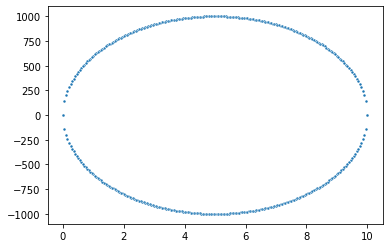

In [4]:
radius = 5
step = .05
byte_height = 1000

points = [(x, math.sqrt(radius**2 - x**2)) for x in np.arange(0, radius+step, step)]
points += [(x, -math.sqrt(radius**2 - x**2)) for x in np.arange(0, radius+step, step)]
points += [(-x, y) for (x, y) in points]
points = [(x + radius, y/radius * byte_height) for (x, y) in points]
# display(points)
x, y = list(zip(*points))

sns.scatterplot(x=x, y=y, marker='.')


<AxesSubplot:>

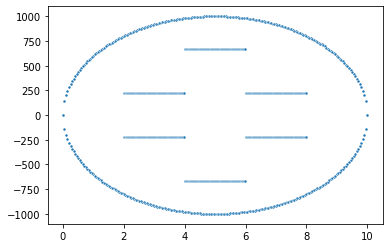

In [3]:
step = 0.03
plus_height = 2/3 * byte_height

plus_points = [(x, plus_height if 4 <= x <= 6 else 1/3 * plus_height) for x in np.arange(radius-3, radius+3+step, step)]
plus_points += [(x, -y) for (x, y) in plus_points]

all_points = points + plus_points
x, y = list(zip(*(all_points)))

sns.scatterplot(x=x, y=y, marker='.')

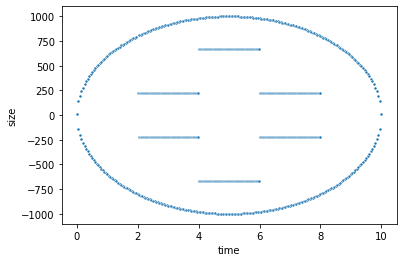

In [4]:
result = pd.DataFrame(all_points, columns=["time", "size"]).sort_values(by="time").reset_index(drop=True)
result["dir"] = result["size"] < 0
result = result.groupby(["time", "dir"]).sample(n=1).reset_index(drop=True)
result["size"] = result["size"].astype(int)
result.loc[result["size"] == 0, "size"] = 10

sns.scatterplot(data=result, x="time", y="size", marker='.')
result[["time", "size"]].to_csv("icrc.csv", header=False, index=False)